# Capstone Project for Springboard Data Analytics Career Track
Ted Groff, July 2020

## Step 1: Setup

In [1]:
import pandas as pd
import sqlite3
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect(r"C:\Users\theod\Documents\DAC_Springboard_Groff\Capstone 2\FPA_FOD_20170508.sqlite")
df = pd.read_sql_query("SELECT FIRE_YEAR,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,CONT_DATE,FIRE_SIZE, DISCOVERY_DOY FROM 'Fires'", con)

# Verify that result of SQL query is stored in the dataframe
print(df.head())
print(df.info())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   CONT_DATE  FIRE_SIZE  DISCOVERY_DOY  
0  2453403.5       0.10             33  
1  2453137.5       0.25            133  
2  2453156.5       0.10            152  
3  2453189.5       0.10            180  
4  2453189.5       0.10            180  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880465 entries, 0 to 1880464
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FIRE_YEAR         int64  
 1   STAT_CAUSE_DESCR  object 
 2   LATITUDE          float64
 3   LONGITUDE    

## Step 2: Data cleansing

In [2]:
#change timestamp to julian date and create a column for duration in days
df['DISC_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df['CONTD_DATE'] = pd.to_datetime(df['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

df['DURATION'] = (df['CONTD_DATE'] - df['DISC_DATE']).dt.days

print(df.head())

   FIRE_YEAR STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  DISCOVERY_DATE  \
0       2005    Miscellaneous  40.036944 -121.005833    CA       2453403.5   
1       2004        Lightning  38.933056 -120.404444    CA       2453137.5   
2       2004   Debris Burning  38.984167 -120.735556    CA       2453156.5   
3       2004        Lightning  38.559167 -119.913333    CA       2453184.5   
4       2004        Lightning  38.559167 -119.933056    CA       2453184.5   

   CONT_DATE  FIRE_SIZE  DISCOVERY_DOY  DISC_DATE CONTD_DATE  DURATION  
0  2453403.5       0.10             33 2005-02-02 2005-02-02       0.0  
1  2453137.5       0.25            133 2004-05-12 2004-05-12       0.0  
2  2453156.5       0.10            152 2004-05-31 2004-05-31       0.0  
3  2453189.5       0.10            180 2004-06-28 2004-07-03       5.0  
4  2453189.5       0.10            180 2004-06-28 2004-07-03       5.0  


In [62]:
from datetime import datetime as dt

nldn_1992_df = pd.read_csv(r"C:\Users\theod\Documents\DAC_Springboard_Groff\Capstone 2\nldn-tiles-1992.csv.gz", compression='gzip', header=0, sep=',',quotechar='"', skiprows = 2)

nldn_1992_df = nldn_1992_df.loc[pd.notnull(nldn_1992_df['#ZDAY'])]

nldn_1992_df['date'] = pd.to_datetime(nldn_1992_df['#ZDAY'],format = '%Y%m%d')
print(nldn_1992_df.head())
print(nldn_1992_df.describe())

      #ZDAY  CENTERLON  CENTERLAT  TOTAL_COUNT       date
0  19920101      -97.8       33.6            1 1992-01-01
1  19920101      -98.2       31.5            3 1992-01-01
2  19920101      -99.0       36.2            1 1992-01-01
3  19920101      -96.9       31.4            3 1992-01-01
4  19920101      -80.4       24.6            1 1992-01-01
              #ZDAY     CENTERLON     CENTERLAT   TOTAL_COUNT
count  2.611511e+06  2.611511e+06  2.611511e+06  2.611511e+06
mean   1.992070e+07 -9.414817e+01  3.562209e+01  6.269120e+00
std    1.990463e+02  1.332701e+01  6.601946e+00  1.225645e+01
min    1.992010e+07 -1.749000e+02  1.830000e+01  1.000000e+00
25%    1.992061e+07 -1.039000e+02  3.080000e+01  1.000000e+00
50%    1.992072e+07 -9.350000e+01  3.500000e+01  2.000000e+00
75%    1.992082e+07 -8.320000e+01  3.990000e+01  6.000000e+00
max    1.992123e+07 -6.350000e+01  7.870000e+01  5.500000e+02


## Step 3: Exploratory Data Analysis
Lightning strikes are the leading cause of fires in Colorado, as shown below.

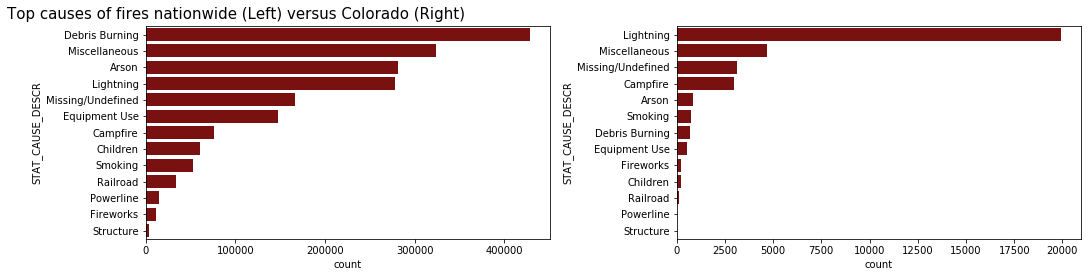

In [3]:
f, axes = plt.subplots(1, 2, sharex=False)
#plt.subplots creates (nrows, ncolumns), call the plot method on each subplot
f.suptitle("Top causes of fires nationwide (Left) versus Colorado (Right)",
          size=15)
df_CO = df[df['STATE']=='CO']

sns.countplot(data=df, y='STAT_CAUSE_DESCR', order=df.STAT_CAUSE_DESCR.value_counts().index, color='darkred', ax=axes[0])
sns.countplot(data=df_CO, y='STAT_CAUSE_DESCR', order=df_CO.STAT_CAUSE_DESCR.value_counts().index, color='darkred', ax=axes[1])

plt.tight_layout(rect=[0, 0.03, 2.5, 0.95])
plt.show()

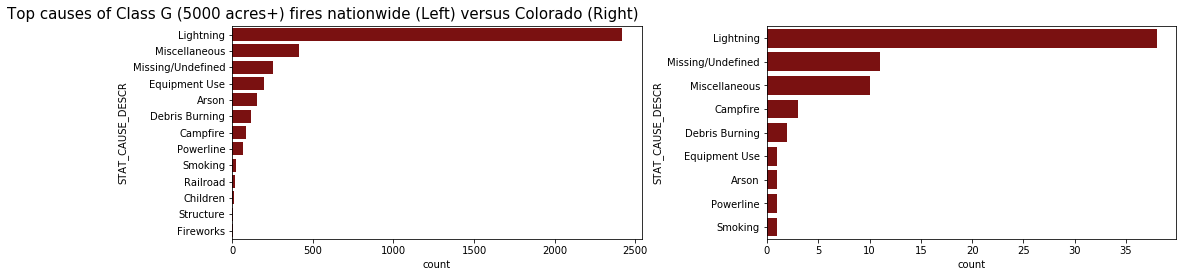

In [4]:
df_large = df[df['FIRE_SIZE']>=5000]
df_CO_large = df_large[df_large['STATE']=='CO']

f, axes = plt.subplots(1, 2, sharex=False)
#plt.subplots creates (nrows, ncolumns), call the plot method on each subplot
f.suptitle("Top causes of Class G (5000 acres+) fires nationwide (Left) versus Colorado (Right)",
          size=15)

sns.countplot(data=df_large, y='STAT_CAUSE_DESCR', order=df_large.STAT_CAUSE_DESCR.value_counts().index, color='darkred', ax=axes[0])
sns.countplot(data=df_CO_large, y='STAT_CAUSE_DESCR', order=df_CO_large.STAT_CAUSE_DESCR.value_counts().index, color='darkred', ax=axes[1])

plt.tight_layout(rect=[0, 0.03, 2.5, 0.95])
plt.show()


Fires caused by lightning strikes are also responsible for the most destruction (summed acreage shown below)

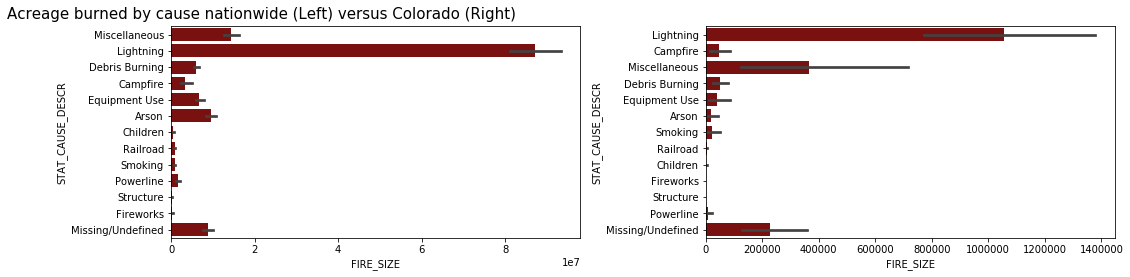

In [5]:
f, axes = plt.subplots(1, 2, sharex=False)
#plt.subplots creates (nrows, ncolumns), call the plot method on each subplot
f.suptitle("Acreage burned by cause nationwide (Left) versus Colorado (Right)",
          size=15)

sns.barplot(x='FIRE_SIZE',y='STAT_CAUSE_DESCR',data=df,color='darkred', estimator=sum, ax=axes[0])
sns.barplot(x='FIRE_SIZE',y='STAT_CAUSE_DESCR',data=df_CO,color='darkred', estimator=sum, ax=axes[1])

plt.tight_layout(rect=[0, 0.03, 2.5, 0.95])
plt.show()

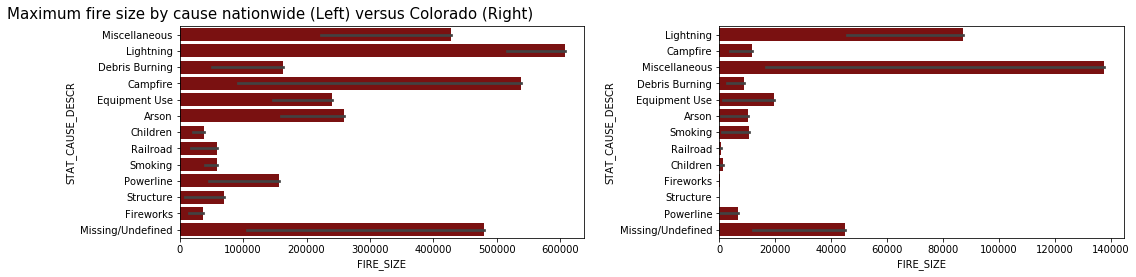

In [162]:
f, axes = plt.subplots(1, 2, sharex=False)
#plt.subplots creates (nrows, ncolumns), call the plot method on each subplot
f.suptitle("Maximum fire size by cause nationwide (Left) versus Colorado (Right)",
          size=15)

sns.barplot(x='FIRE_SIZE',y='STAT_CAUSE_DESCR',data=df,color='darkred', estimator=max, ax=axes[0])
sns.barplot(x='FIRE_SIZE',y='STAT_CAUSE_DESCR',data=df_CO,color='darkred', estimator=max, ax=axes[1])

plt.tight_layout(rect=[0, 0.03, 2.5, 0.95])
plt.show()

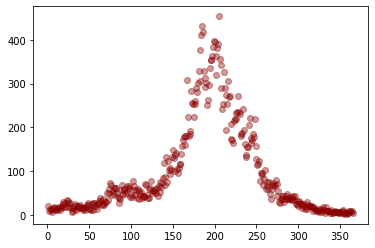

In [16]:
CO_fire_date = df_CO.groupby('DISCOVERY_DOY').size()
plt.scatter(CO_fire_date.index, CO_fire_date.values, color='darkred', alpha=0.4)
plt.show()

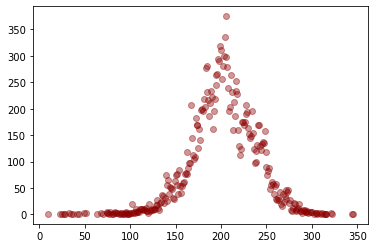

In [17]:
df_lightning = df[df['STAT_CAUSE_DESCR']=='Lightning']
df_CO_light = df_lightning[df_lightning['STATE']=='CO']
CO_light_fire_date = df_CO_light.groupby('DISCOVERY_DOY').size()
plt.scatter(CO_light_fire_date.index, CO_light_fire_date.values, color='darkred', alpha=0.4)
plt.show()

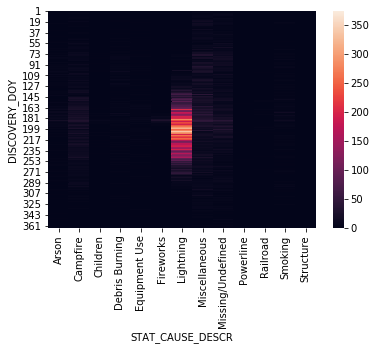

In [78]:
sns.heatmap(pd.crosstab(df_CO.DISCOVERY_DOY, df_CO.STAT_CAUSE_DESCR))
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

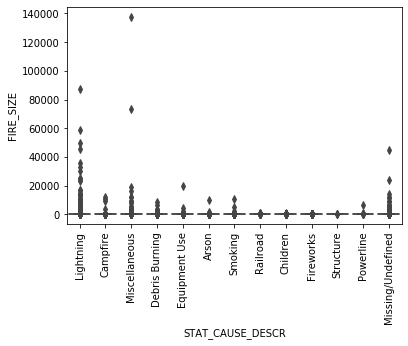

In [180]:
sns.boxplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=df_CO)
plt.xticks(rotation=90, size=10)

Since the vast majority of fires are small (0-1 acres), the data are skewed. If we narrow our data down to only show Class G fires (5000+ acres), then we should be able to get some more valuable insights.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

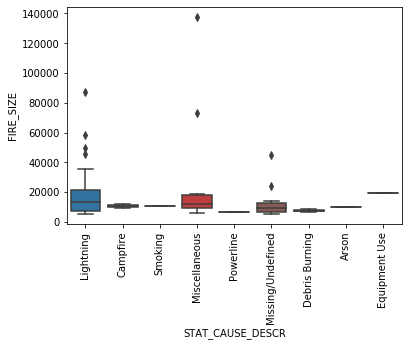

In [188]:
df_large = df[df['FIRE_SIZE']>=5000] #creating a new dataframe for Class G fires
df_CO_large = df_large[df_large['STATE']=='CO']

sns.boxplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=df_CO_large)
plt.xticks(rotation=90, size=10)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

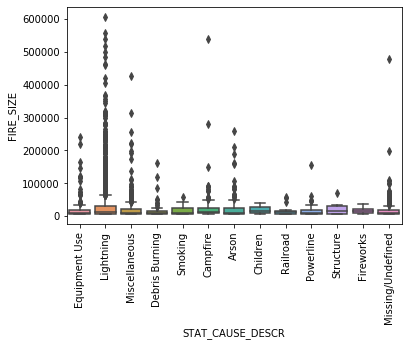

In [32]:
df_large = df[df['FIRE_SIZE']>=5000]

sns.boxplot(x='STAT_CAUSE_DESCR', y='FIRE_SIZE', data=df_large)
plt.xticks(rotation=90, size=10)

In [9]:
from sklearn import tree, preprocessing
le = preprocessing.LabelEncoder()
df_CO_large2 = df_CO_large
df_CO_large2['STAT_CAUSE_DESCR'] = le.fit_transform(df_CO_large2['STAT_CAUSE_DESCR'])
print(df_CO_large2.head())

       FIRE_YEAR  STAT_CAUSE_DESCR   LATITUDE   LONGITUDE STATE  \
1588        2005                 4  38.169722 -105.038056    CO   
29704       2008                 4  37.526944 -103.769444    CO   
40666       2009                 4  37.646389 -108.718333    CO   
92853       1996                 1  37.621667 -103.621667    CO   
92855       1996                 1  39.338333 -105.338333    CO   

       DISCOVERY_DATE  CONT_DATE  FIRE_SIZE  DISCOVERY_DOY  DISC_DATE  \
1588        2453558.5  2453567.5    11357.0            188 2005-07-07   
29704       2454626.5  2454645.5    45814.0            161 2008-06-09   
40666       2455050.5  2455102.5     7300.0            219 2009-08-07   
92853       2450174.5  2450177.5     9523.0             92 1996-04-01   
92855       2450221.5  2450227.5    11875.0            139 1996-05-18   

      CONTD_DATE  DURATION  
1588  2005-07-16       9.0  
29704 2008-06-28      19.0  
40666 2009-09-28      52.0  
92853 1996-04-04       3.0  
92855 1996-05

C:\Users\theod\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


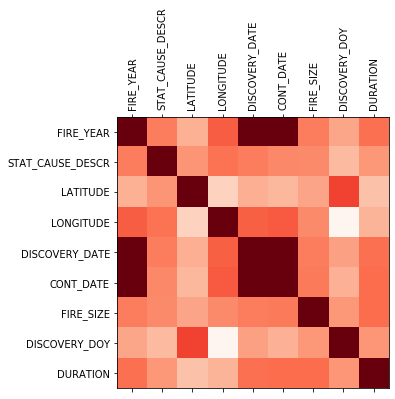

In [30]:
def plot_corr(df_CO_large,size=5):
    corr = df_CO_large.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Reds)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)    
    plt.show()
    
plot_corr(df_CO_large)

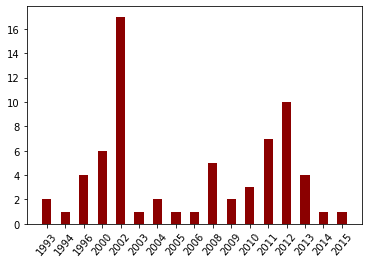

In [31]:
CO_large_fire_year = df_CO_large.groupby('FIRE_YEAR').size()
plt.bar(range(len(CO_large_fire_year)), CO_large_fire_year.values, width = 0.5, color='Darkred')
plt.xticks(range(len(CO_large_fire_year)), CO_large_fire_year.index, rotation = 50)
plt.show()

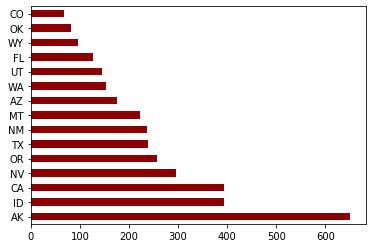

In [23]:
df_large['STATE'].value_counts().head(n=15).plot(kind='barh',color='darkred')
plt.show()

# Sources:
Short, Karen C. 2017. Spatial wildfire occurrence data for the United States, 1992-2015 [FPAFOD20170508]. 4th Edition. Fort Collins, CO: Forest Service Research Data Archive. https://doi.org/10.2737/RDS-2013-0009.4

NOAA — https://www.kaggle.com/noaa/noaa-severe-weather-data-inventory?select=swdi_nldn.zip